# **GDSC Recruitments 2025 (Round 2 Tasks)**

####**Task 1: CIFAR-10 Image Classification with Deep Learning**

The CIFAR-10 dataset (Canadian Institute for Advanced Research) is a widely used benchmark dataset for image classification tasks. It consists of 60,000 color images (32x32 pixels) divided into 10 classes:

🔹 Airplane ✈️
🔹 Automobile 🚗
🔹 Bird 🐦
🔹 Cat 🐱
🔹 Deer 🦌
🔹 Dog 🐶
🔹 Frog 🐸
🔹 Horse 🐴
🔹 Ship 🚢
🔹 Truck 🚚

Each class contains 6,000 images, with 50,000 for training and 10,000 for testing. The dataset is often used for deep learning experiments involving Convolutional Neural Networks (CNNs) and Transfer Learning.

Importing the dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

#Loading the CIFAR10 dataset from tensorflow datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Normalising the training and testing dataset in the range of [0,1] by dividing by 255

**Why are we normalising ?**
A Neural Network is seen to converge better , prevents large weight updates and perform better and show better accuracy on normalised data and for faster calculations

In [2]:
x_train, x_test = x_train / 255.0, x_test / 255.0

One-hot encoding

**Why One-Hot Encoding ?**
One-hot encoding is used to convert categorical labels (0-9 for CIFAR-10) into a format suitable for training a neural network. Instead of a single number, each label is represented as a vector of length 10, where only the correct class index is 1, and the rest are 0.

In [3]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Testing the dataset and displaying the class images

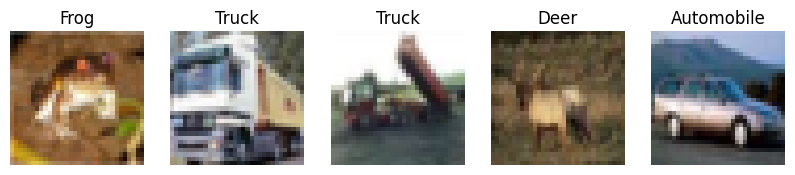

In [4]:
cat = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].set_title(cat[np.argmax(y_train[i])])
    axes[i].axis('off')
plt.show()

Building the Convulational Neural Network (CNN) Model (based on the task description given)

To classify images from the CIFAR-10 dataset, we constructed a **Convolutional Neural Network (CNN)** using **TensorFlow** and **Keras**. The model begins with a **Conv2D layer** with 32 filters and a kernel size of (3,3), followed by **Batch Normalization** to stabilize training. **MaxPooling2D** is applied to reduce spatial dimensions, and **Dropout** helps prevent overfitting. This pattern repeats with increasing filter sizes (64, 128) to extract deeper hierarchical features. The network is then flattened, followed by fully connected (**Dense**) layers for classification. A final **softmax** layer outputs probabilities for 10 classes. The model is compiled using the **Adam** optimizer and **categorical cross-entropy loss**, after **hyperparameter tuning**,  ensuring efficient learning and accurate predictions. 🚀









In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
#setting up the sequential model
Model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Hyperparameter tuning involves selecting optimal values for parameters like learning rate and batch size to enhance model performance. In this case, the learning rate was set to 0.0005, and a batch size of 128 was chosen.

In [6]:
#compiling the model using adam optimiser and catgorical cross entropy loss after hyperparameter tuning
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)  # Tuned learning rate
Model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Defining the callbacks (Early stopping)

**Overfitting** is a condition in which the model starts showing close predictions towards the training set, which affects its accuracy while predicting on test data or any new data. To avoid that, Early Stopping monitors the validation loss during training and stops the process if the loss stops improving for a set number of epochs (patience). This helps prevent overfitting and ensures that the model generalizes well to unseen data.

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Training the CNN model

The CNN model is trained using the CIFAR-10 dataset, where the images are normalized and labels are one-hot encoded. The model is compiled with the Adam optimizer and categorical cross-entropy loss function. Training is performed using a batch size of 64 for up to 50 epochs, with early stopping implemented to monitor validation loss and halt training when no improvement is detected for five consecutive epochs. This ensures optimal training efficiency while preventing overfitting. The model's performance is evaluated based on accuracy and loss curves for both training and validation sets.

In [8]:
history = Model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=128,
    callbacks=[es]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.3062 - loss: 2.2940 - val_accuracy: 0.1207 - val_loss: 3.2413
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4895 - loss: 1.4564 - val_accuracy: 0.5460 - val_loss: 1.2592
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5613 - loss: 1.2345 - val_accuracy: 0.5409 - val_loss: 1.3395
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6096 - loss: 1.1027 - val_accuracy: 0.6508 - val_loss: 0.9757
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6403 - loss: 1.0172 - val_accuracy: 0.6903 - val_loss: 0.8927
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6631 - loss: 0.9557 - val_accuracy: 0.6884 - val_loss: 0.8790
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6845 - loss: 0.8975 - val_accuracy: 0.7234 - val_loss: 0.7944
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7055 - loss: 0.8525 - val_accuracy: 

Model Summary, Evaluation and Accuracy-Loss Curves

Model evaluation was conducted using key metrics such as accuracy, precision, recall, and F1-score to assess classification performance. Finally, training and validation accuracy/loss curves were plotted to visualize model learning trends and detect signs of overfitting or underfitting, ensuring a well-generalized model.

In [9]:
Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,073,248 (4.09 MB)

 Trainable params: 357,514 (1.36 MB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 715,030 (2.73 MB)

In [11]:
# model evaluation
from sklearn.metrics import classification_report
y_pred = Model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=cat))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:
              precision    recall  f1-score   support

    Airplane       0.86      0.81      0.83      1000
  Automobile       0.91      0.92      0.92      1000
        Bird       0.73      0.73      0.73      1000
         Cat       0.69      0.66      0.67      1000
        Deer       0.74      0.84      0.79      1000
         Dog       0.76      0.72      0.74      1000
        Frog       0.87      0.84      0.85      1000
       Horse       0.88      0.85      0.86      1000
        Ship       0.85      0.92      0.89      1000
       Truck       0.89      0.89      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



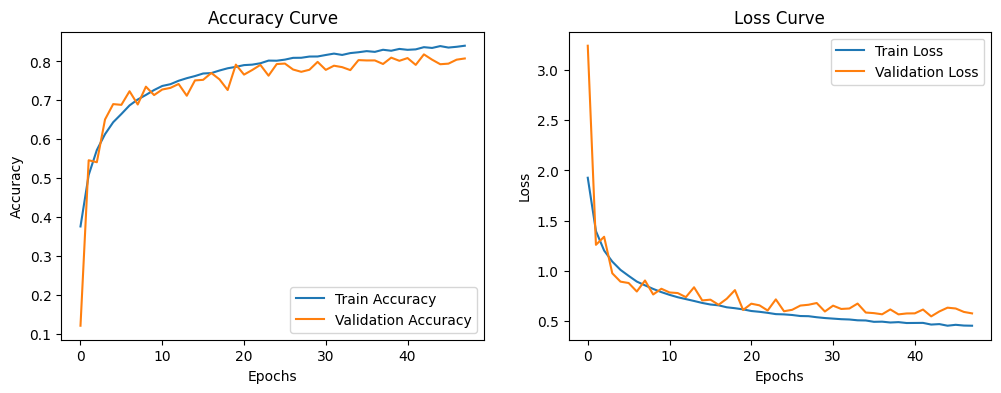

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()